<h1>Exploratory Data Analysis</h1>

In [1]:
import pandas as pd

<b>Data Loading for Analysis<b>

In [2]:
User_details = pd.read_csv("F:\\Upliance Assignment\\UserDetails.csv")
User_details.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,15-01-2023,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,20-02-2023,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,10-03-2023,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,05-04-2023,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,22-05-2023,777-888-9999,emma@email.com,Lunch,9


In [3]:
Cooking_sessions = pd.read_csv("F:\\Upliance Assignment\\CookingSessions.csv")
Cooking_sessions.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00,2024-12-01 12:20,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30,2024-12-02 20:10,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30,2024-12-02 08:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00,2024-12-03 13:15,15,4.7


In [4]:
Order_details = pd.read_csv("F:\\Upliance Assignment\\OrderDetails.csv")
Order_details.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


<b>Data Cleaning</b>

In [5]:
User_details.columns

Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders'],
      dtype='object')

In [6]:
User_details.drop_duplicates().head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,15-01-2023,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,20-02-2023,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,10-03-2023,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,05-04-2023,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,22-05-2023,777-888-9999,emma@email.com,Lunch,9


<b>Check for missing Values<b>

In [7]:
missing_values = User_details.isnull().sum()

In [8]:
missing_values

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

In [9]:
User_details['Registration Date'] = pd.to_datetime(User_details['Registration Date'], format='%d-%m-%Y')

In [10]:
User_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 852.0+ bytes


In [11]:
Cooking_sessions.columns

Index(['Session ID', 'User ID', 'Dish Name', 'Meal Type', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating'],
      dtype='object')

In [12]:
Cooking_sessions.drop_duplicates().head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00,2024-12-01 12:20,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30,2024-12-02 20:10,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30,2024-12-02 08:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00,2024-12-03 13:15,15,4.7


In [13]:
Cooking_sessions['Session Start'] = pd.to_datetime(Cooking_sessions['Session Start'])
Cooking_sessions['Session End'] = pd.to_datetime(Cooking_sessions['Session End'])

<b>Validating Data Integrity,
Ensuring 'Session End' is after 'Session Start' in CookingSessions.<b>

In [14]:
Cooking_sessions = Cooking_sessions[Cooking_sessions['Session End'] > Cooking_sessions['Session Start']]

In [15]:
Cooking_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Session ID       16 non-null     object        
 1   User ID          16 non-null     object        
 2   Dish Name        16 non-null     object        
 3   Meal Type        16 non-null     object        
 4   Session Start    16 non-null     datetime64[ns]
 5   Session End      16 non-null     datetime64[ns]
 6   Duration (mins)  16 non-null     int64         
 7   Session Rating   16 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 1.1+ KB


In [16]:
Order_details.columns

Index(['Order ID', 'User ID', 'Order Date', 'Meal Type', 'Dish Name',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID'],
      dtype='object')

In [17]:
Order_details.drop_duplicates().head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [18]:
# Convert Amount (USD) in OrderDetails to float
Order_details['Amount (USD)'] = pd.to_numeric(Order_details['Amount (USD)'], errors='coerce')
#convert Order Date in OrderDetails to datetime format
Order_details['Order Date'] = pd.to_datetime(Order_details['Order Date'])

In [19]:
# Impute missing Rating with the median value
median_rating = Order_details['Rating'].median()
Order_details['Rating'].fillna(median_rating, inplace=True)
Order_details['Rating']


0     5.0
1     4.0
2     4.0
3     4.0
4     4.0
5     4.0
6     4.0
7     4.0
8     5.0
9     4.0
10    4.0
11    4.0
12    4.0
13    5.0
14    5.0
15    4.0
Name: Rating, dtype: float64

In [20]:
Order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      16 non-null     int64         
 1   User ID       16 non-null     object        
 2   Order Date    16 non-null     datetime64[ns]
 3   Meal Type     16 non-null     object        
 4   Dish Name     16 non-null     object        
 5   Order Status  16 non-null     object        
 6   Amount (USD)  16 non-null     float64       
 7   Time of Day   16 non-null     object        
 8   Rating        16 non-null     float64       
 9   Session ID    16 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.4+ KB


<b>Observation<b>
1. Ensuring duplicate records are not present in the datasets.
2. Converted 'Registration Date' in UserDetails to datetime format.
3. Ensured 'Session End' is after 'Session Start' in CookingSessions.
4. Converted 'Amount (USD)' in OrderDetails to float data type.


<b>Data Merging<b>

In [21]:
# Merge UserDetails with CookingSessions
User_sessions = pd.merge(User_details, Cooking_sessions, on='User ID', how='inner')

# Merge the result with OrderDetails
final_df = pd.merge(User_sessions, Order_details, on=['User ID', 'Session ID'], how='inner')

In [22]:
final_df.head(2)

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,...,Duration (mins),Session Rating,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,30,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,30,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0


In [23]:
final_df.describe(include='all')

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,...,Duration (mins),Session Rating,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
count,16,16,16.000000,16,16,16,16,16,16.000000,16,...,16.000000,16.000000,16.000000,16,16,16,16,16.000000,16,16.000000
unique,8,8,NaN,8,NaN,8,8,3,NaN,16,...,NaN,NaN,NaN,NaN,3,6,2,NaN,3,NaN
top,U001,Alice Johnson,NaN,New York,NaN,123-456-7890,alice@email.com,Dinner,NaN,S001,...,NaN,NaN,NaN,NaN,Dinner,Spaghetti,Completed,NaN,Night,NaN
freq,3,3,NaN,3,NaN,3,3,7,NaN,1,...,NaN,NaN,NaN,NaN,8,4,14,NaN,8,NaN
mean,NaN,NaN,32.687500,NaN,2023-03-31 16:30:00,NaN,NaN,NaN,10.562500,NaN,...,30.312500,4.518750,1008.500000,2024-12-04 12:00:00,NaN,NaN,NaN,11.250000,NaN,4.250000
min,NaN,NaN,25.000000,NaN,2023-01-15 00:00:00,NaN,NaN,NaN,5.000000,NaN,...,10.000000,4.000000,1001.000000,2024-12-01 00:00:00,NaN,NaN,NaN,7.000000,NaN,4.000000
25%,NaN,NaN,28.000000,NaN,2023-02-20 00:00:00,NaN,NaN,NaN,8.000000,NaN,...,20.000000,4.300000,1004.750000,2024-12-02 18:00:00,NaN,NaN,NaN,9.000000,NaN,4.000000
50%,NaN,NaN,30.500000,NaN,2023-03-10 00:00:00,NaN,NaN,NaN,10.000000,NaN,...,30.000000,4.550000,1008.500000,2024-12-04 12:00:00,NaN,NaN,NaN,11.500000,NaN,4.000000
75%,NaN,NaN,35.750000,NaN,2023-05-22 00:00:00,NaN,NaN,NaN,12.500000,NaN,...,40.000000,4.725000,1012.250000,2024-12-06 06:00:00,NaN,NaN,NaN,13.125000,NaN,4.250000
max,NaN,NaN,42.000000,NaN,2023-08-11 00:00:00,NaN,NaN,NaN,15.000000,NaN,...,45.000000,5.000000,1016.000000,2024-12-08 00:00:00,NaN,NaN,NaN,15.000000,NaN,5.000000


In [24]:
final_df.columns

Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders', 'Session ID', 'Dish Name_x',
       'Meal Type_x', 'Session Start', 'Session End', 'Duration (mins)',
       'Session Rating', 'Order ID', 'Order Date', 'Meal Type_y',
       'Dish Name_y', 'Order Status', 'Amount (USD)', 'Time of Day', 'Rating'],
      dtype='object')

<b>Identify the most frequently cooked and ordered dishes<b>

In [25]:
popular_dishes = print(final_df['Dish Name_x'].value_counts())

Dish Name_x
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


<b>Correlation between session rating and amount<b>

In [26]:
final_df[['Session Rating', 'Amount (USD)']].corr()

,Session Rating,Amount (USD)
Session Rating,1.000000,0.502733
Amount (USD),0.502733,1.000000


<b>Demographic Insights<b>

In [27]:
age_groups = pd.cut(final_df['Age'], bins=[20, 30, 40, 50], labels=['20-30', '30-40', '40-50'])
demographic_analysis =final_df.groupby(age_groups).mean(numeric_only='True')
demographic_analysis

,Age,Total Orders,Duration (mins),Session Rating,Order ID,Amount (USD),Rating
Age,,,,,,,
20-30,27.875,10.125,34.375,4.60,1008.125000,11.500000,4.375
30-40,34.800,8.600,24.000,4.34,1009.800000,11.200000,4.200
40-50,42.000,15.000,30.000,4.60,1007.333333,10.666667,4.000


<b>Data Visualization<b>

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

<b>Display the frequency of popular dishes.<b>

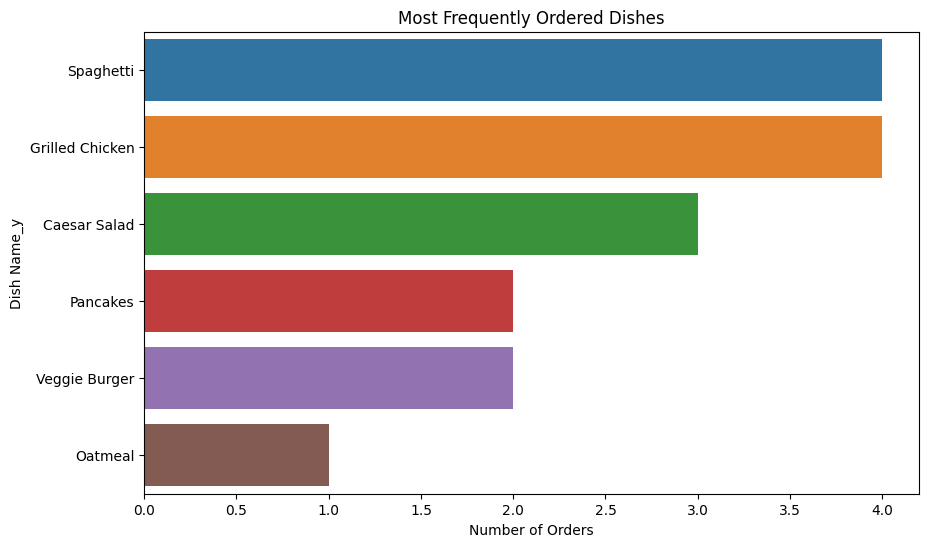

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(y=final_df['Dish Name_y'], order=final_df['Dish Name_y'].value_counts().index)
plt.title('Most Frequently Ordered Dishes')
plt.xlabel('Number of Orders')
plt.ylabel('Dish Name_y')
plt.show()


<b>Identify the number of users per location.<b>

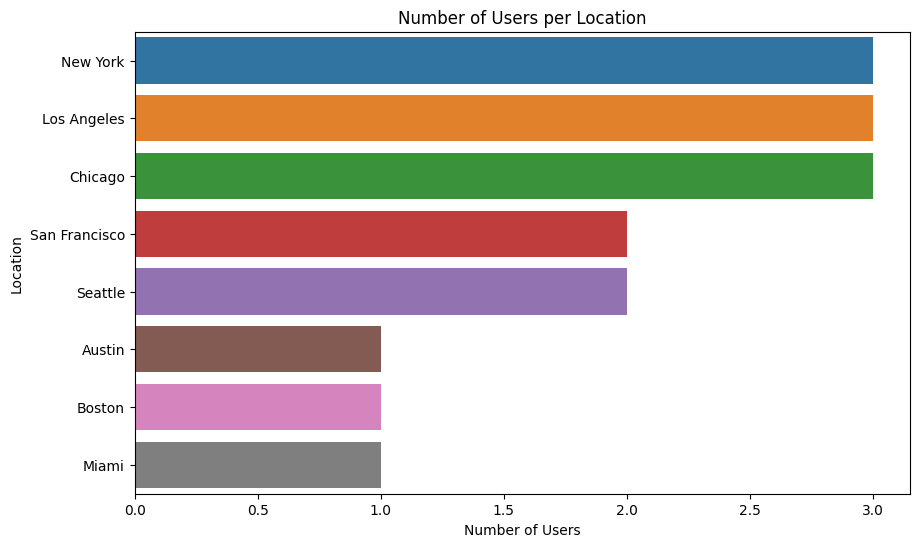

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(y=final_df['Location'], order=final_df['Location'].value_counts().index)
plt.title('Number of Users per Location')
plt.xlabel('Number of Users')
plt.ylabel('Location')
plt.show()


<b>Compare the average cooking session duration across different meal types.<b>

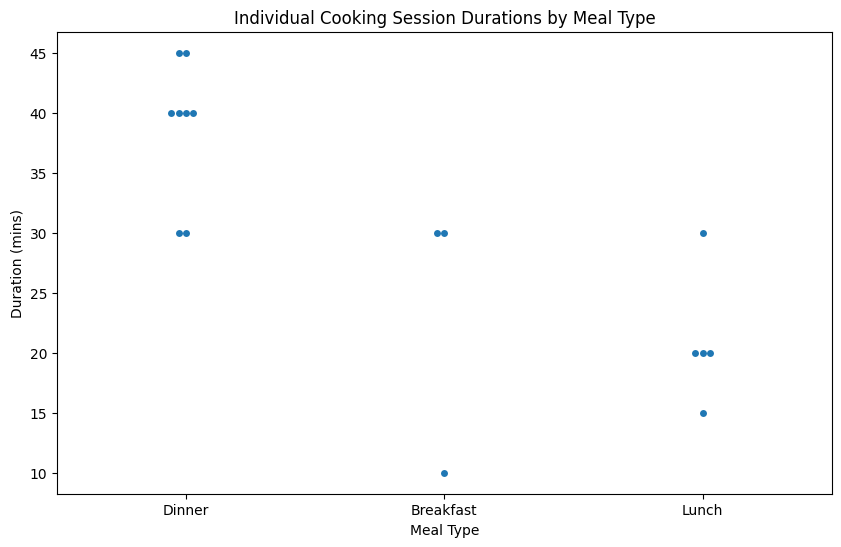

In [31]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Meal Type_y', y='Duration (mins)', data=final_df)
plt.title('Individual Cooking Session Durations by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Duration (mins)')
plt.show()


By leveraging this chart, we can able to identify the potential outliers and clusters

<b>Compare the total revenue generated by different meal types.<b>

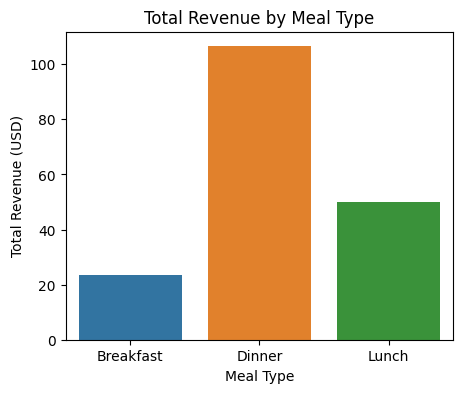

In [32]:
revenue_by_meal = final_df.groupby('Meal Type_y')['Amount (USD)'].sum().reset_index()

plt.figure(figsize=(5, 4))
sns.barplot(x='Meal Type_y', y='Amount (USD)', data=revenue_by_meal)
plt.title('Total Revenue by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Total Revenue (USD)')
plt.show()


<b>Identify dishes with higher cancellation rates.<b>

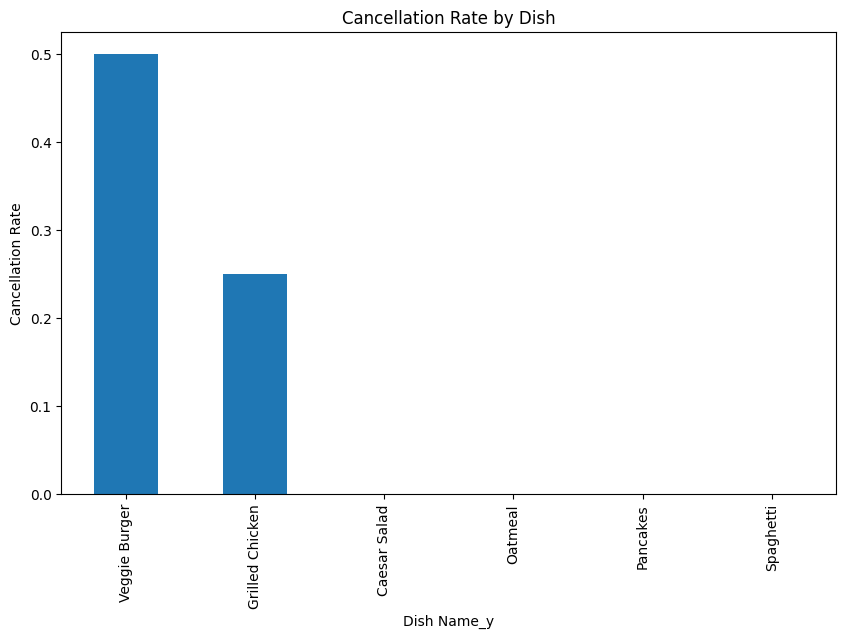

In [33]:
cancellation_rate = final_df[final_df['Order Status'] == 'Canceled']['Dish Name_y'].value_counts() / final_df['Dish Name_y'].value_counts()

plt.figure(figsize=(10, 6))
cancellation_rate.sort_values(ascending=False).plot(kind='bar')
plt.title('Cancellation Rate by Dish')
plt.xlabel('Dish Name_y')
plt.ylabel('Cancellation Rate')
plt.show()

<b>Average Order Value by Age Group<b>

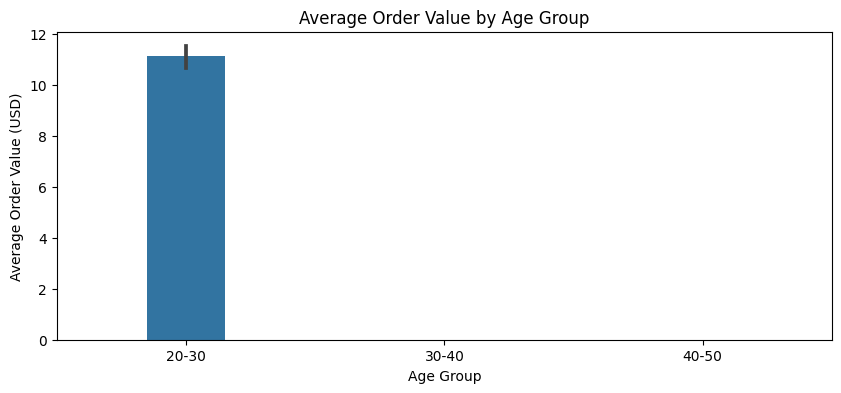

In [34]:
age_groups = pd.cut(final_df['Age'], bins=[20, 30, 40, 50], labels=['20-30', '30-40', '40-50'])
avg_order_value_by_age = final_df.groupby(age_groups)['Amount (USD)'].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(x=age_groups, y='Amount (USD)', data=avg_order_value_by_age, width=0.3)
plt.title('Average Order Value by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Order Value (USD)')
plt.show()


<b>Compare the average cooking session duration across different meal types.<b>

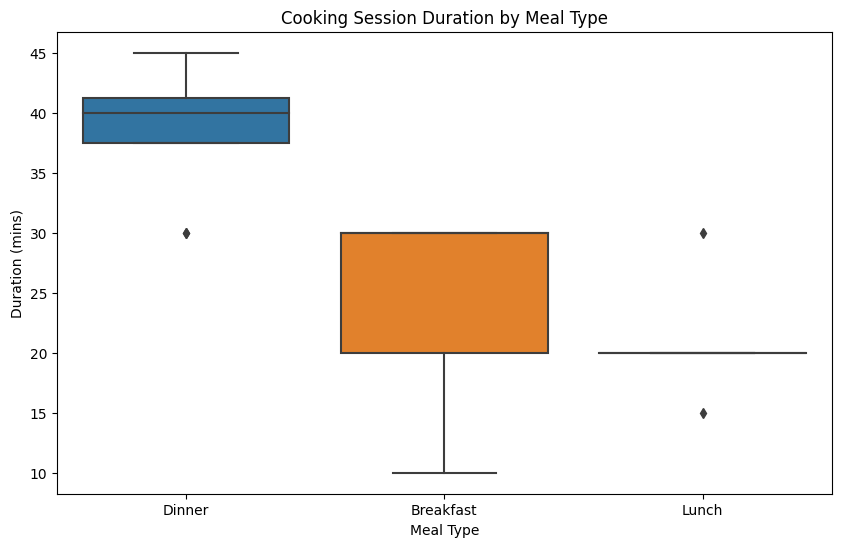

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Meal Type_y', y='Duration (mins)', data=final_df)
plt.title('Cooking Session Duration by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Duration (mins)')
plt.show()


<b>Determine preferred meal types across different age groups.<b>

In [36]:
age_groups = pd.cut(final_df['Age'], bins=[20, 30, 40, 50], labels=['20-30', '30-40', '40-50'])
favorite_meal_by_age = final_df.groupby([age_groups, 'Favorite Meal']).size().unstack().fillna(0)
print(favorite_meal_by_age)


Favorite Meal  Breakfast  Dinner  Lunch
Age                                    
20-30                  0       6      2
30-40                  1       1      3
40-50                  3       0      0


<h3>Observations</h3>

<p><b>Meal Preferences:</b>
    Breakfast is most popular for younger users (20-30), while older users (40-50) prefer it significantly more than other meals.
Dinner is a significant choice for users in the 30-40 range.

<b>Order Trends:</b>
    The 40-50 age group places the most orders but has a higher average session duration (15 minutes).
20-30 years has the highest session rating (4.60) despite a lower number of orders.

<b>Spending:</b>
    Younger age groups (20-30) spend more on average per order ($11.50) compared to older groups, but ratings are slightly higher in the 20-30 group as well. </p>

<h1>Thank you !!<h1>